- Linear regression in sklearn v.s. Keras. 
- Validation data in Keras
- Getting coefficients (weights) in Keras.

In [43]:
import ds_utils.imports; import imp; imp.reload(ds_utils.imports)
from ds_utils.imports import *

Using Theano backend.


## Data

In [100]:
X = np.random.uniform(size=1000).reshape(-1, 1)
bias = 1
w = 2
noise = np.random.normal(scale=0.1, size=y.shape)
y = np.dot(X, w) + bias + noise
y = y.reshape(-1, 1)

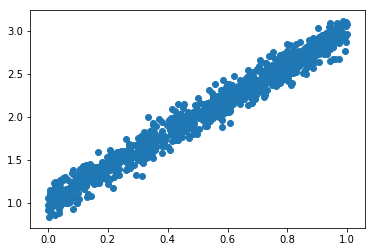

In [101]:
plt.scatter(X, y)

In [102]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)

In [103]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 1), (800, 1), (200, 1), (200, 1))

## Linear regression

In [106]:
mdl = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [107]:
y_pred = mdl.predict(X_test)

In [108]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.010623054344415111

In [111]:
mdl.coef_

array([[ 1.98434475]])

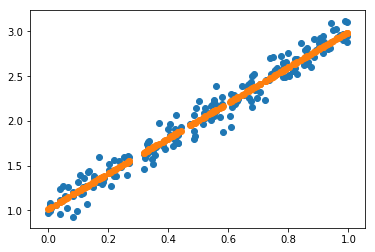

In [110]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

## Keras linear regression

In [112]:
mdl = keras.models.Sequential(
    [keras.layers.Dense(
        units=y_train.shape[1], input_dim=X_train.shape[1])])
mdl.compile(optimizer=keras.optimizers.SGD(lr=0.1), loss='mse', metrics=[])
mdl.fit(x=X_train,
        y=y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test))

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s - loss: 0.2397 - val_loss: 0.0170
Epoch 2/10
800/800 [==============================] - 0s - loss: 0.0141 - val_loss: 0.0141
Epoch 3/10
800/800 [==============================] - 0s - loss: 0.0121 - val_loss: 0.0125
Epoch 4/10
800/800 [==============================] - 0s - loss: 0.0111 - val_loss: 0.0118
Epoch 5/10
800/800 [==============================] - 0s - loss: 0.0105 - val_loss: 0.0112
Epoch 6/10
800/800 [==============================] - 0s - loss: 0.0102 - val_loss: 0.0112
Epoch 7/10
800/800 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0108

In [113]:
y_pred = mdl.predict(X_test)

In [114]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

0.01116122625907987

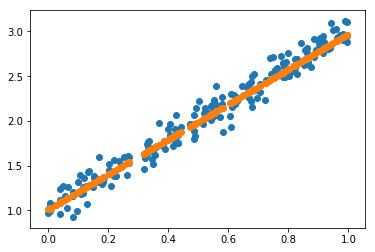

In [116]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

In [123]:
mdl.evaluate(X_test, y_test)

 32/200 [===>..........................] - ETA: 0s

0.011161224450916052

In [117]:
mdl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________


In [121]:
mdl.get_layer('dense_6').get_weights()

[array([[ 1.96372533]], dtype=float32), array([ 1.00714719], dtype=float32)]

In [122]:
mdl.get_weights()

[array([[ 1.96372533]], dtype=float32), array([ 1.00714719], dtype=float32)]